## Visualizing Earnings Based on College Majors
The aim of this project to analyse earnings based on college majors by visualizing the data.

The working data set is on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:
- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Dropping rows with missing values.

In [5]:
print(recent_grads.count())
raw_data_count = 173

Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   172
Major_category          173
ShareWomen              172
Sample_size             173
Employed                173
Full_time               173
Part_time               173
Full_time_year_round    173
Unemployed              173
Unemployment_rate       173
Median                  173
P25th                   173
P75th                   173
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           173
dtype: int64


In [6]:
recent_grads = recent_grads.dropna()
print(recent_grads.count())
cleaned_data_count = 172

Rank                    172
Major_code              172
Major                   172
Total                   172
Men                     172
Women                   172
Major_category          172
ShareWomen              172
Sample_size             172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
dtype: int64


There was only one row containing missing values and was dropped.

## Explring the data (Scatter plots)

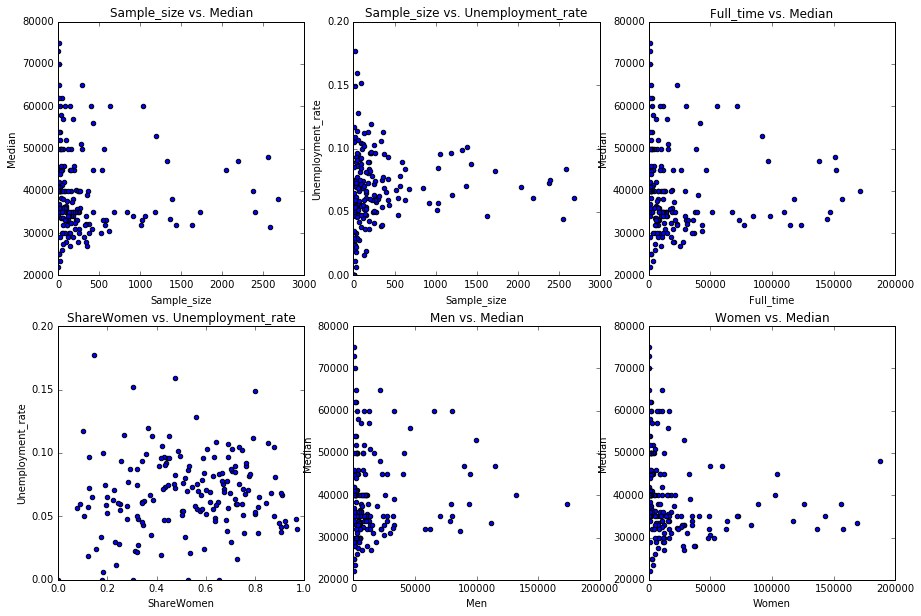

In [7]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.scatter(recent_grads["Sample_size"], recent_grads["Median"])
ax1.set_title("Sample_size vs. Median")
ax1.set_xlabel("Sample_size")
ax1.set_ylabel("Median")
ax1.set_xlim(0,3000)
ax1.set_ylim(20000, 80000)

ax2.scatter(recent_grads["Sample_size"], recent_grads["Unemployment_rate"])
ax2.set_title("Sample_size vs. Unemployment_rate")
ax2.set_xlabel("Sample_size")
ax2.set_ylabel("Unemployment_rate")
ax2.set_xlim(0,3000)
ax2.set_ylim(0, 0.2)

ax3.scatter(recent_grads["Full_time"], recent_grads["Median"])
ax3.set_title("Full_time vs. Median")
ax3.set_xlabel("Full_time")
ax3.set_ylabel("Median")
ax3.set_xlim(0,200000)
ax3.set_ylim(20000,80000)

ax4.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
ax4.set_title("ShareWomen vs. Unemployment_rate")
ax4.set_xlabel("ShareWomen")
ax4.set_ylabel("Unemployment_rate")
ax4.set_xlim(0,1)
ax4.set_ylim(0, 0.2)

ax5.scatter(recent_grads["Men"], recent_grads["Median"])
ax5.set_title("Men vs. Median")
ax5.set_xlabel("Men")
ax5.set_ylabel("Median")
ax5.set_xlim(0,200000)
ax5.set_ylim(20000, 80000)

ax6.scatter(recent_grads["Women"], recent_grads["Median"])
ax6.set_title("Women vs. Median")
ax6.set_xlabel("Women")
ax6.set_ylabel("Median")
ax6.set_xlim(0,200000)
ax6.set_ylim(20000, 80000)

plt.show()

Students in more popular majors make money less than average jf all majors. The spread of the eranings is big for the unpopular majors. It is in the range of very low to the very high earnings.

The gender matters. Female make less money than male. The average median salary of women is ~ 30000 when men earn more ~ 35000.

There is no link between full time employees and median salary. The avergae median salary doesn't depend on the fulltime job.

## Exploring the data (histogramms)

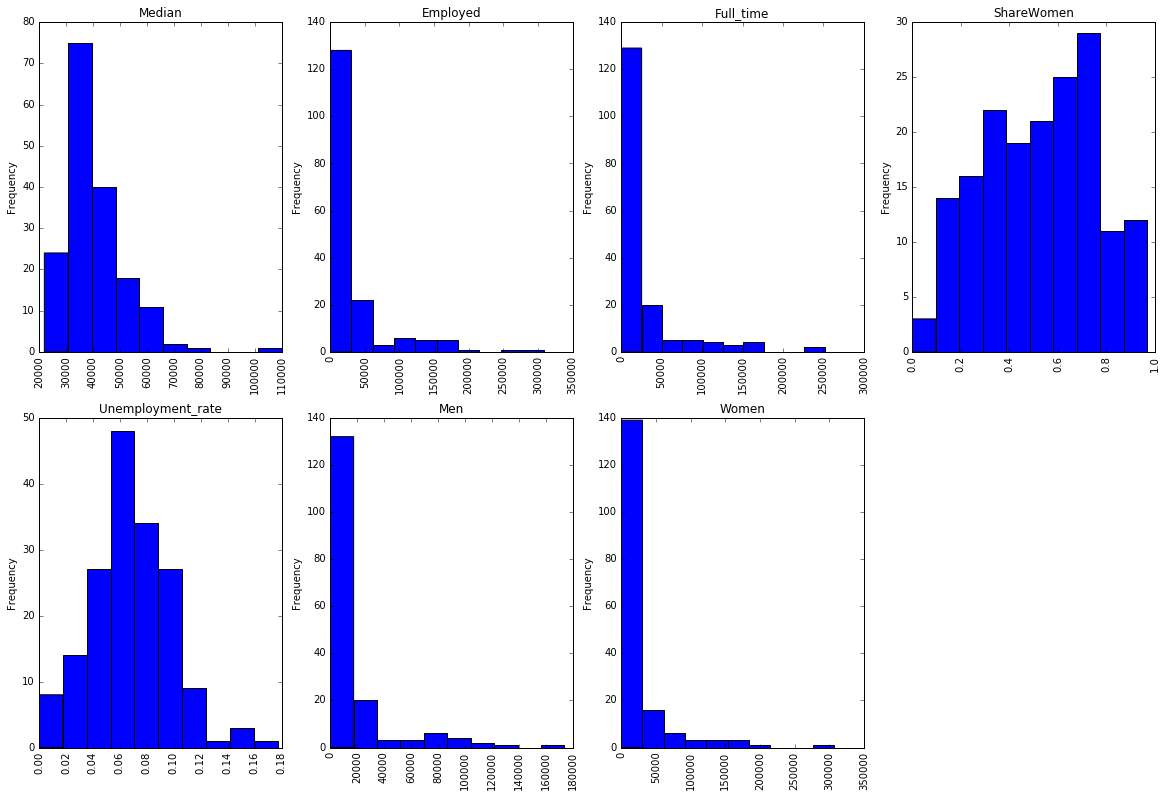

In [8]:
col = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(20,13))

for i in range(1,8):
    ax = fig.add_subplot(2,4,i)
    ax = recent_grads[col[i]].plot(kind="hist",rot=90, title=col[i])
plt.show()

The most common median salary range is 30000-50000$ regardles of the gender.

60% of majors are predominatley female and 40% are male.

## Scatter Matrix plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5685e7cf98>,
      dtype=object)

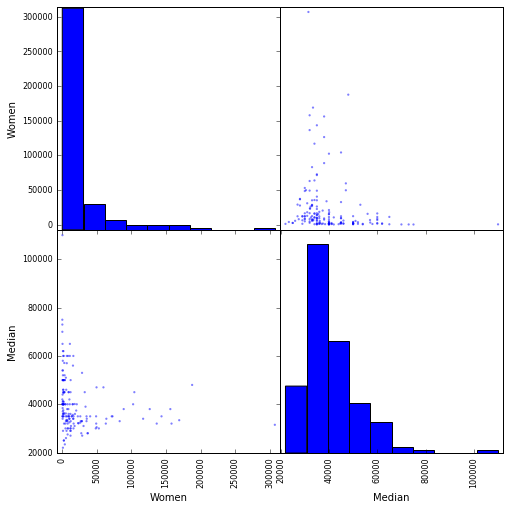

In [9]:
scatter_matrix(recent_grads[["Women", "Median"]], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f567febe8d0>,
      dtype=object)

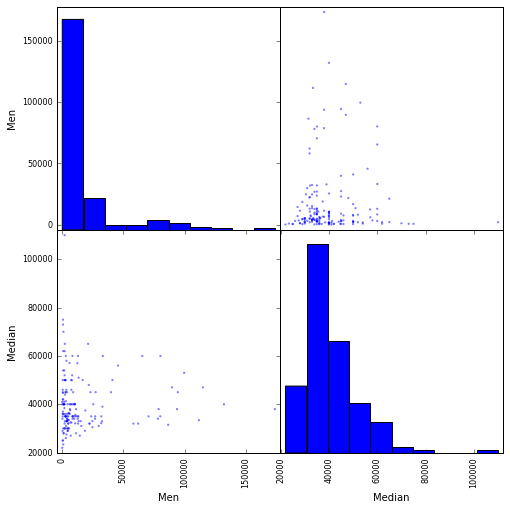

In [10]:
scatter_matrix(recent_grads[["Men", "Median"]], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f567fe48d30>,
      dtype=object)

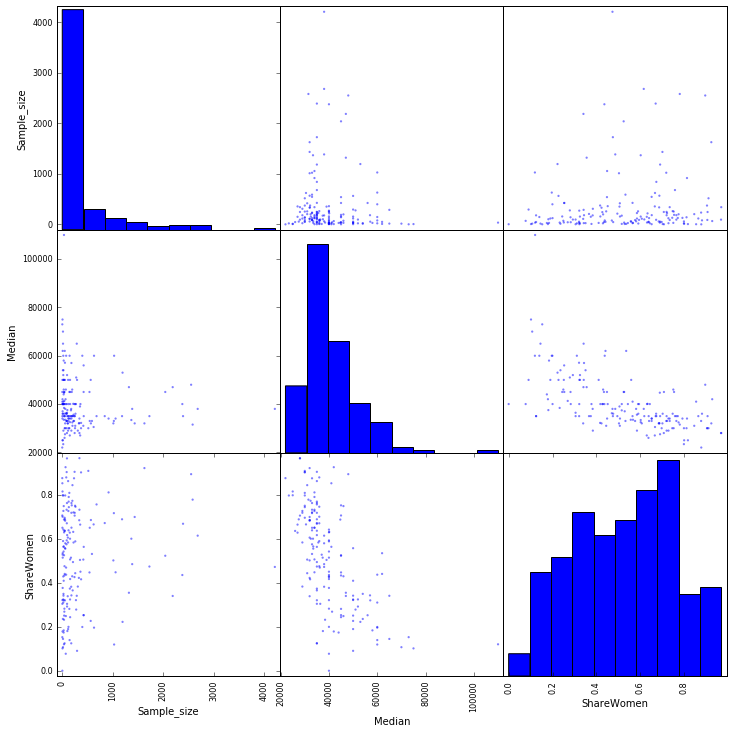

In [11]:
scatter_matrix(recent_grads[["Sample_size", "Median", "ShareWomen"]], figsize=(12,12))

There is an exponential trend between median salary and the gender. Female majors tend to hav less median salary than male ones.

The most common female median salary range is 20000-40000\$. The men median salary range is wider and higher than female one. It is 30000-80000\$.

## Exploring data with pandas' bars

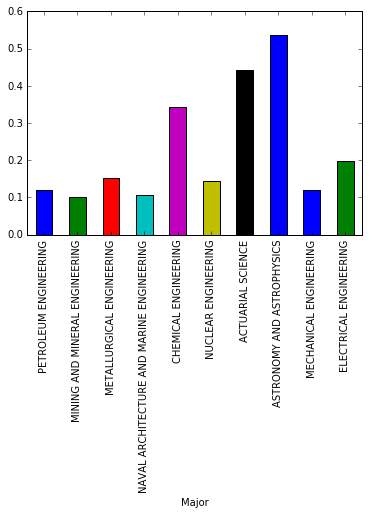

In [12]:
recent_grads[:10].plot(x="Major", y="ShareWomen", kind="bar", legend=False)

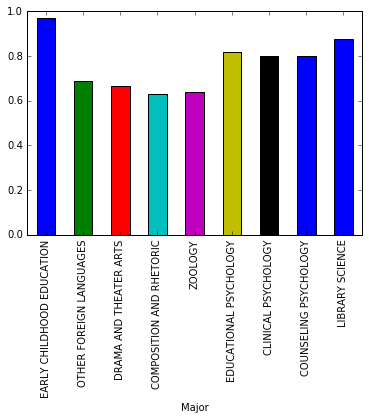

In [13]:
recent_grads[163:].plot(x="Major", y="ShareWomen", kind="bar", legend=False)

Engeneering majors tend to have less female than male. On the other hand, the humanities majors are popular amoung women than men. The share of women there is more than 0.6 and reaching almost 1 for some majors.

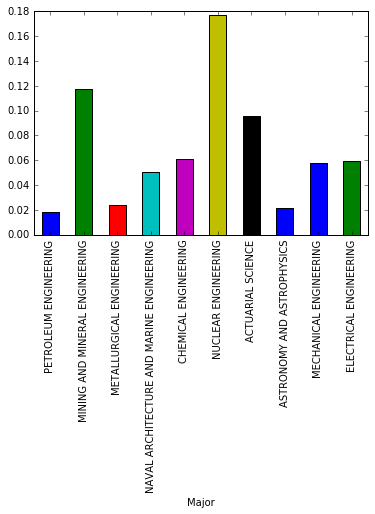

In [14]:
recent_grads[:10].plot(x="Major", y="Unemployment_rate", kind="bar", legend=False)

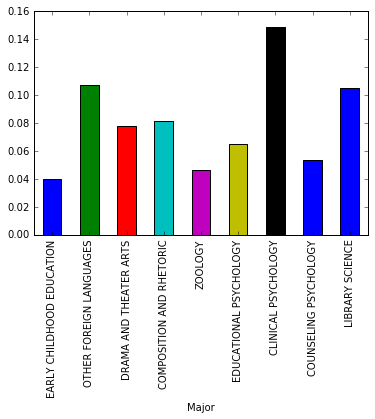

In [15]:
recent_grads[163:].plot(x="Major", y="Unemployment_rate", kind="bar", legend=False)

The engeneering majors have low unemployment rate (0.02-0.1) when humanities majors have higher unemployemt rate (0.04-0.11).

## Number of men and women in each major category 

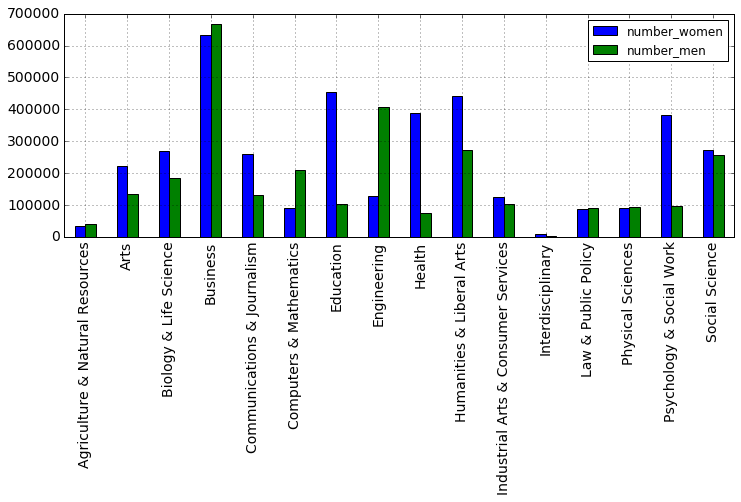

In [24]:
major_category = recent_grads["Major_category"].unique()

number_women_majors = {}
number_men_majors = {}

for m in major_category:
    selected_rows = recent_grads[recent_grads["Major_category"] == m]
    sum_women_major = selected_rows["Women"].sum()
    sum_men_major = selected_rows["Men"].sum()
    number_women_majors[m] = int(sum_women_major)
    number_men_majors[m] = int(sum_men_major)
    
number_women_series = pd.Series(number_women_majors)
number_men_series = pd.Series(number_men_majors)

number_w_m_majors = pd.DataFrame(number_women_series, columns=["number_women"])
number_w_m_majors["number_men"] = number_men_series
#number_w_m_majors

number_w_m_majors.plot.bar(figsize=(12,4), rot=90, fontsize=14, grid=True)

There is significant difference in number of men and women in majors like Education, Health, Humanities @ Liberal Arts and Psychology where women predominate. Whereas, men predominate in Engeneering majors. Women tend to choose some majors more than men nut the number difference is not significant. It relates to Arts, Biology, Communications, Insudtrial Arts. The distribution for the rest majors: Agriculture, Interdisciplinary, Law, Physical Science and Social Science, is ~ 50/50 for women/men.